In [1]:
#import gizmo_analysis as gizmo
#import utilities as ut

import pynbody

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.stats as ss

import pandas as pd
import numpy as np 

import glob

In [2]:
datapath = '/home/jmwick/H1-merian/fire/csvs'
#datapath = '/home/jw1624/H1-merian/fire/csvs'

In [3]:
matplotlib.rc('font', family='serif')
rcParams['axes.linewidth'] = 3
rcParams['xtick.major.width'] = 3
rcParams['xtick.major.size'] = 12
rcParams['ytick.major.width'] = 3
rcParams['ytick.major.size'] = 12

rcParams['xtick.minor.width'] = 2
rcParams['xtick.minor.size'] = 8
rcParams['ytick.minor.width'] = 2
rcParams['ytick.minor.size'] = 8

rcParams['font.family'] = 'serif'

rcParams['text.usetex'] = False

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.transparent'] = False

In [4]:
currentGals = glob.glob(datapath+'/*.txt')
currentGals.sort()
currentGals

['/home/jmwick/H1-merian/fire/csvs/m11b_r2100.txt',
 '/home/jmwick/H1-merian/fire/csvs/m11d_r7100.txt',
 '/home/jmwick/H1-merian/fire/csvs/m11e_r7100.txt',
 '/home/jmwick/H1-merian/fire/csvs/m11h_r7100.txt',
 '/home/jmwick/H1-merian/fire/csvs/m11i_r7100.txt',
 '/home/jmwick/H1-merian/fire/csvs/m11q_r880.txt']

In [5]:
galnames = ['m11b', 'm11d', 'm11e', 'm11h', 'm11i', 'm11q']

In [14]:
pd.read_csv(currentGals[0]).head()

,galaxyID,tstep,t,tlookback,z,M_star,R_halfmass,sigma_allstars_global,sigma_allstars_los,sigma_youngstar_global,sigma_youngstar_los,sigma_coldgas_los,sigma_hotgas_los,SFR_10,SFR_100,sSFR_10,sSFR_100
0,m11b_r2100,600,13.798747,0.000000,0.000000,54881784.0,2.13623,18.995872,12.905206,NaN,NaN,3.576598,11.053715,0.0,60121.652,0.0,-10.960397
1,m11b_r2100,599,13.796529,0.002218,0.000159,54882590.0,2.13623,18.999924,12.688189,NaN,NaN,3.464312,11.051632,0.0,62027.810,0.0,-10.946848
2,m11b_r2100,598,13.794310,0.004437,0.000319,54883050.0,2.13623,19.005846,12.769965,NaN,NaN,3.545673,11.028715,0.0,62032.840,0.0,-10.946817
3,m11b_r2100,597,13.792093,0.006654,0.000478,54883784.0,2.13623,19.013996,12.683571,NaN,NaN,3.674657,11.067517,0.0,62037.043,0.0,-10.946793
4,m11b_r2100,596,13.789874,0.008872,0.000637,54884668.0,2.13623,19.024874,13.140306,NaN,NaN,3.434472,11.049148,0.0,62037.043,0.0,-10.946800


In [7]:
# Note: m11b has NaN sigma youngstar; also only have a few timesteps so thats kinda fine to exclude it

## 3 Panel

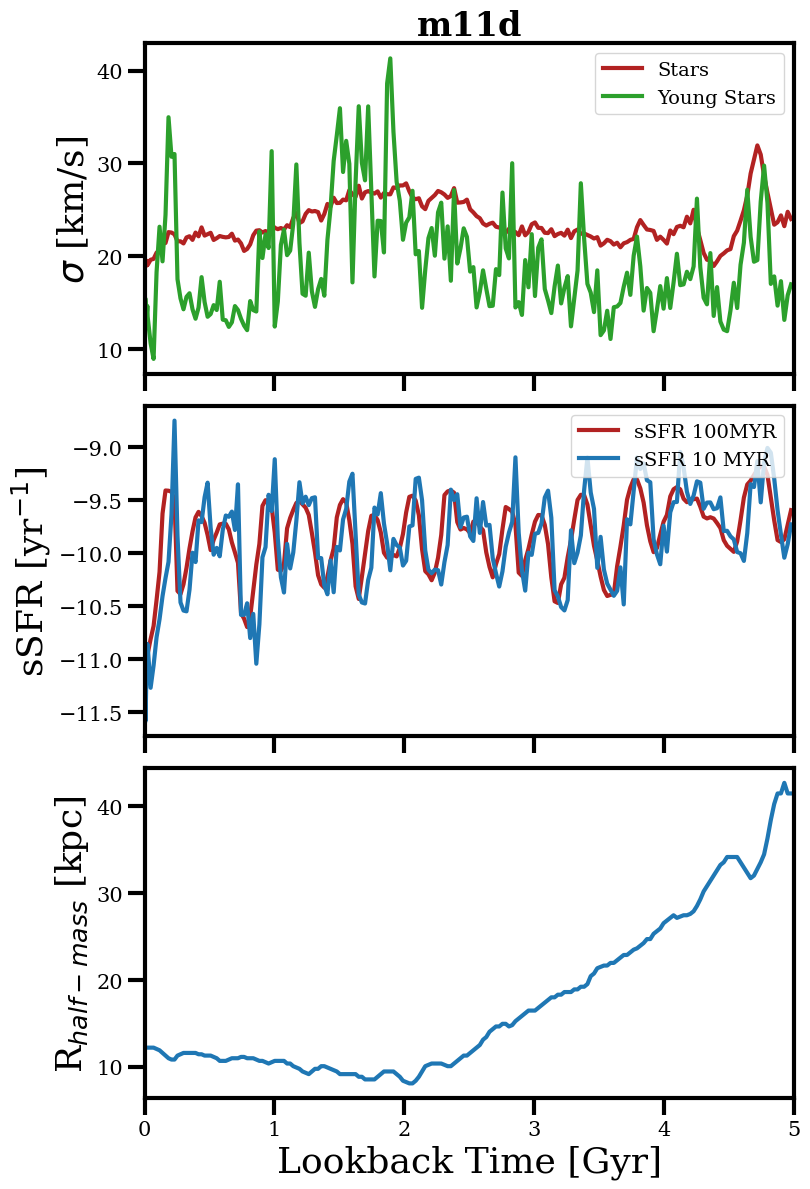

In [9]:
idx=1
gal = currentGals[idx]
tlim = 5

data = pd.read_csv(gal)

fig, axs = plt.subplots(3,1, facecolor='w', figsize=(8,12), sharex=True)

axs[0].set_title(galnames[idx], fontsize=24, weight='bold')

# get lookback time 
tlookback = data['tlookback']

tmask = tlookback<tlim

# top panel: sigma
sigAS = data['sigma_allstars_los'][tmask]
sigYS = data['sigma_youngstar_los'][tmask]

axs[0].plot(tlookback[tmask], sigAS,linewidth=3, color='firebrick')
axs[0].plot(tlookback[tmask], sigYS,linewidth=3, color='tab:green')
#axs[0].plot(tlookback[tmask], sigCGw,linewidth=3, color='tab:blue')

axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].set_ylabel(r'$\sigma$ [km/s]', fontsize=26)
axs[0].legend(['Stars', 'Young Stars', 'Cold Gas'], fontsize=14, loc=1)
axs[0].set_xlim([0,tlim])

# middle panel: sSFR
ssfr10 = data['sSFR_10'][tmask]
ssfr100= data['sSFR_100'][tmask]

l1=axs[1].plot(tlookback[tmask], ssfr100, color='firebrick', linewidth=3)
l2=axs[1].plot(tlookback[tmask], ssfr10, color='tab:blue', linewidth=3)

axs[1].tick_params(axis='both', which='major', labelsize=15)    
axs[1].set_ylabel(r'sSFR [yr$^{-1}$]', fontsize=26)

# adding alpha to middle panel 
#axalpha = axs[1].twinx() 
#l3=axalpha.plot(tlookback[tmask], data['alpha'][tmask], c='k')

#axalpha.tick_params(axis='both', which='major', labelsize=15)
#axalpha.set_ylabel(r'$\alpha$', fontsize=26)
#axalpha.set_ylim([0,-1])

axs[1].legend(['sSFR 100MYR', 'sSFR 10 MYR'], fontsize=14, loc=1)

# Bottom panel: half-mass radius
Rhm = data['R_halfmass'][tmask]

axs[2].plot(tlookback[tmask], Rhm, linewidth=3)
#axs[2].plot(tlookback[tmask], Rhls, linewidth=1, marker='^')
#axs[2].plot(tlookback[tmask], Rhlc, linewidth=1, marker='^')

axs[2].tick_params(axis='both', which='major', labelsize=15)
axs[2].set_ylabel(r'R$_{half-mass}$ [kpc]', fontsize=26)
axs[2].set_xlabel('Lookback Time [Gyr]', fontsize=26)

##
#axs[0].set_ylim(top=35)
#axs[1].set_ylim(top=-7.8)
#axs[2].set_ylim(top=17)

plt.tight_layout()

#plt.savefig('../figures/breathingModes/fire/threePanel/'+galnames[idx]+'.png')

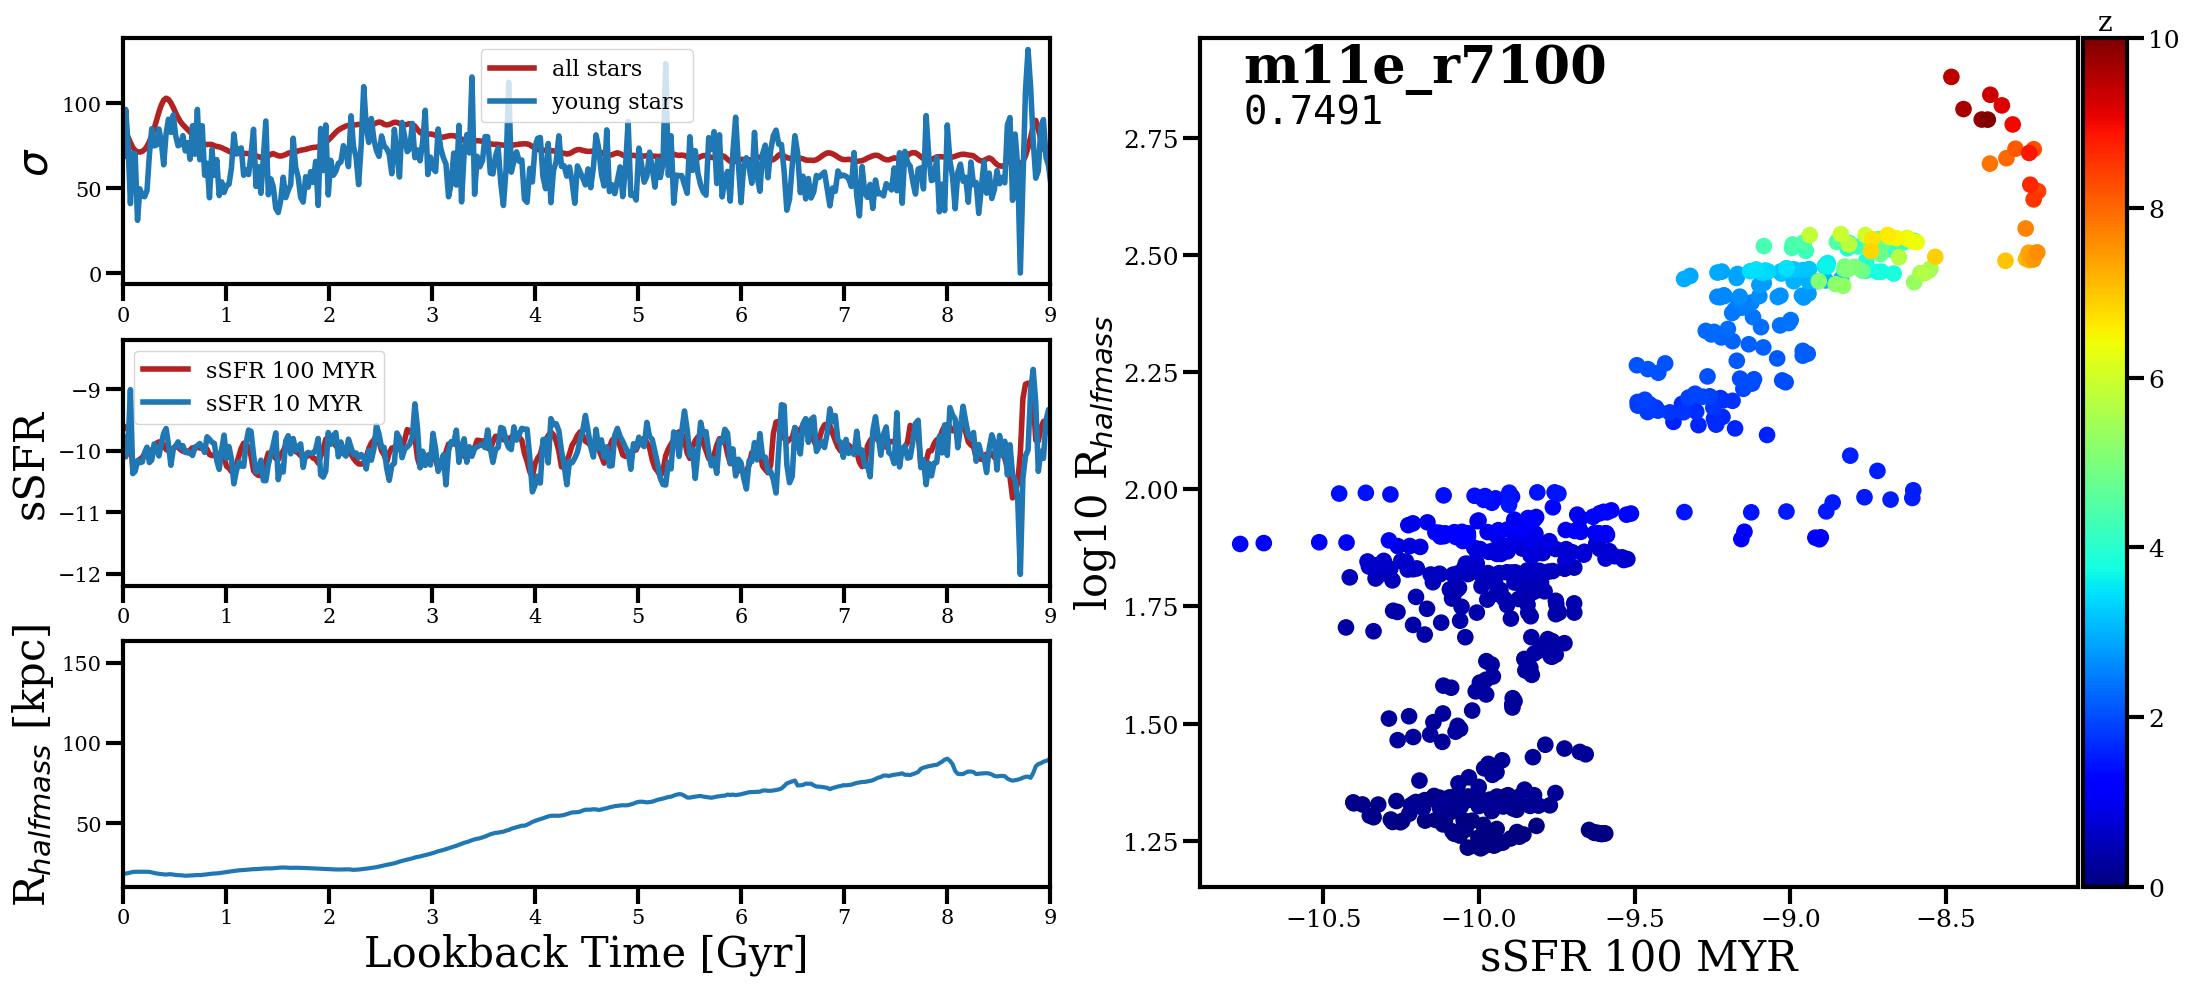

In [61]:
gal = currentGals[2]
zmax = 10
ymin = -1

tlim = 9

data = pd.read_csv(gal)
tlookback = data['tlookback']
mask = tlookback<tlim

# set up fig
fig = plt.figure(facecolor='w', figsize=(22,10))

ax3 = fig.add_subplot(3,2,5)
ax2 = fig.add_subplot(3,2,3, sharex=ax3)
ax1 = fig.add_subplot(3,2,1, sharex=ax3)

axscatter = fig.add_subplot(1,2,2)

ax1.tick_params(axis='y', which='major', labelsize=18)
ax2.tick_params(axis='y', which='major', labelsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)

ax1.tick_params(axis='x', which='major', labelsize=0)    
ax2.tick_params(axis='x', which='major', labelsize=0)

axscatter.tick_params(axis='both', which='major', labelsize=18)

## Line plots 
# top panel: sigma
sigStar = data['sigma_star'][tlookback<tlim+1]
sigYoungStar = data['sigma_youngstar'][tlookback<tlim+1]

ax1.plot(tlookback[tlookback<tlim+1], sigStar, linewidth=4, color='firebrick')
ax1.plot(tlookback[tlookback<tlim+1], sigYoungStar, linewidth=4, color='tab:blue')

ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_ylabel(r'$\sigma$', fontsize=30)

ax1.legend(['all stars', 'young stars'], fontsize=16)

ax1.set_xlim([0,tlim])
#ax1.set_ylim([0,80])

# middle panel: sSFR
ssfr10 = data['sSFR_10'][tlookback<tlim+1]
ssfr100= data['sSFR_100'][tlookback<tlim+1]

ax2.plot(tlookback[tlookback<tlim+1], ssfr100, color='firebrick', linewidth=4)
ax2.plot(tlookback[tlookback<tlim+1], ssfr10, color='tab:blue', linewidth=4)

ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel('sSFR', fontsize=30)

ax2.legend(['sSFR 100 MYR', 'sSFR 10 MYR'], fontsize=16)

#ax2.set_ylim(top=-9)

# Bottom panel: half-light radius
Rhl = data['R_halfmass'][tlookback<tlim+1]

ax3.plot(tlookback[tlookback<tlim+1], Rhl, linewidth=3)

#axs[2].set_ylim([0,5])
ax3.tick_params(axis='both', which='major', labelsize=15)

ax3.set_ylabel(r'R$_{halfmass}$ [kpc]', fontsize=30)

ax3.set_xlabel('Lookback Time [Gyr]', fontsize=30)

## scatter
x = data['sSFR_100'][data['z'] <= zmax]
y = np.log10(data['R_halfmass'][data['z'] <= zmax])
c = data['z'][data['z'] <= zmax]

c = c[y > ymin]
x = x[y > ymin]
y = y[y > ymin]

rs = ss.spearmanr(x,y)[0]

sc = axscatter.scatter(x, y, c=c, cmap='jet', s=120)

axscatter.set_xlabel('sSFR 100 MYR', fontsize=30)
axscatter.set_ylabel(r'log10 R$_{halfmass}$', fontsize=30)

axscatter.text(s=str(gal[-14:-4]), x=min(x[x>-20]+0.01), y=max(y)-0.01, fontsize=38, weight='bold')
axscatter.text(s=str(rs)[:6], x=min(x[x>-20]+0.01), y=max(y)-0.1, fontsize=28, fontfamily='monospace')

#plt.ylim([3,4.5])
#plt.xlim([0.0,0.4])

divider = make_axes_locatable(axscatter)
clb = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc, cax=clb, orientation='vertical')

clb.set_title('z', fontsize=20)
clb.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()

#plt.savefig('../fire/figures/breathingScatterLines/'+str(gal[-14:-4])+'.png')

In [17]:
for i in sig: print(i)

1.3212930909573175
1.323950942785875
1.322465181648468
1.3223391965018083
1.3238498551084918
1.3239009948614784
1.32581128623896
1.328378447216755
1.3284088676714592
1.3293080555819947
1.340536010758587
1.3498361121820321
1.3694228928611032
1.380551880218973
1.3906306622011457
1.4135835848208629
1.427765205608198
1.427955432504424
1.3319346898654318
1.2918690525166703
1.291024047086298
1.2963516650457314
1.3032420678686643
1.3128018320364514
1.3274536533828925
1.3460127996706042
1.3509785272564023
1.34725481714848
1.332608179199066
1.3179110676666297
1.307700056787715
1.3037623072388702
1.306440681883884
1.3193948111744696
1.3176879271072184
1.313324100927764
1.3142974388769937
1.3070638776842651
1.305422278672346
1.3030715909932873
1.303821004029398
1.3101711235545344
1.3166978145309067
1.324679498594899
1.3358572180008255
1.3510320618802576
1.371036568387029
1.3892856505010556
1.3956498405757443
1.3851695528047274
1.3601166766974961
1.3216267754686446
1.3227522350358132
1.33355995006

nan

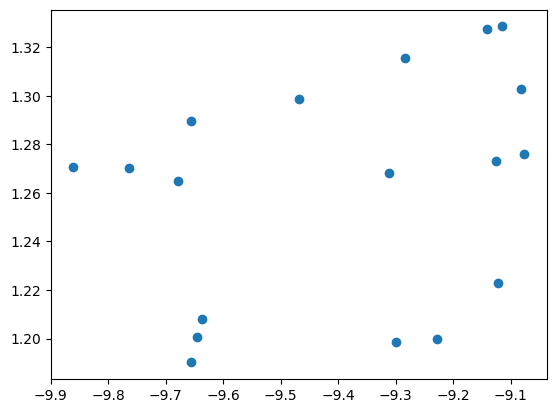

In [27]:
# Scatter sSFR and sigma at different redshift ranges
gal = currentGals[1]

data = pd.read_csv(gal)

zmin = 2.0
zmax = 2.5

ssfr = data['sSFR_100']
sig = np.log10(data['sigma_hotgas_los'])
z = data['z']

zmask = z>zmin
ssfr = ssfr[zmask]
sig = sig[zmask]
z = z[zmask]

zmask = z<zmax
ssfr = ssfr[zmask]
sig = sig[zmask]
z = z[zmask]

plt.scatter(ssfr, sig)

ss.spearmanr(ssfr,sig)[0]

# Group Figures

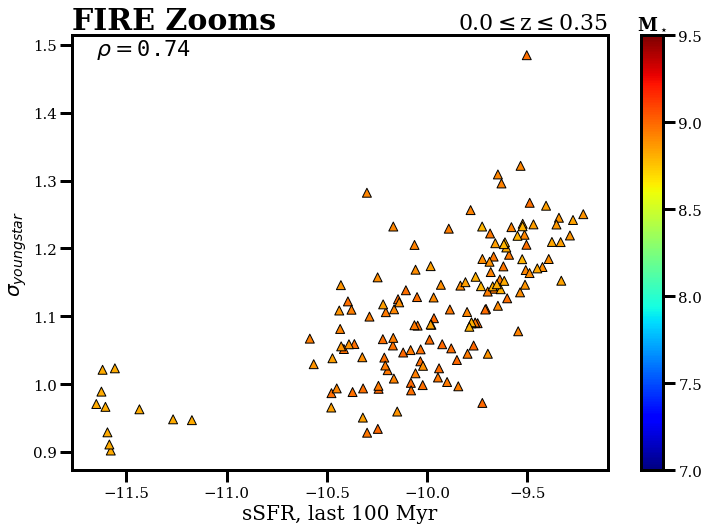

In [8]:
zmin = 0.00
zmax = 0.35

mmin = 8.75
mmax = 9.0
fig = plt.figure(facecolor='w', figsize=(12,8))

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=13)

# get data
sigGas = []
ssfr = []
mall = []
for idx,gal in enumerate(currentGals[1:]):
    data = pd.read_csv(gal)

    x = data['sSFR_100'][data['z'] <= zmax].to_numpy()
    y = np.log10(data['sigma_coldgas_los'][data['z'] <= zmax].to_numpy())
    c = np.log10(data['M_star'][data['z'] <= zmax].to_numpy())
    z = data['z'][data['z']<= zmax].to_numpy()
    
    x = x[z>=zmin]
    y = y[z>=zmin]
    c = c[z>=zmin]
    
    x = x[c>=mmin]
    y = y[c>=mmin]
    c = c[c>=mmin]
    
    x = x[c<=mmax]
    y = y[c<=mmax]
    c = c[c<=mmax]
    
    for i,_ in enumerate(x):
        ssfr.append(x[i])
        sigGas.append(y[i])
        mall.append(c[i])
        
rs = ss.spearmanr(sigGas, ssfr)[0]
        
# scatter 
plt.scatter(ssfr, sigGas, c=mall, cmap='jet', s=80, ec='k', marker='^', vmin=7.0, vmax=9.5)

plt.xlabel('sSFR, last 100 Myr', fontsize=20)
plt.ylabel(r'$\sigma_{youngstar}$', fontsize=20)

clb = plt.colorbar()
clb.ax.set_title(r'M$_\star$', fontsize=18, weight='bold')
clb.ax.tick_params(labelsize=15)

plt.title('FIRE Zooms', fontsize=30, weight='bold', loc='left')
plt.title(str(zmin)+r'$\leq$z$\leq$'+str(zmax), fontsize=22, loc='right')

plt.text(x=min(ssfr), y=max(sigGas), s=r'$\rho=$'+str(rs)[:4], fontsize=22, fontfamily='monospace')

ff = '../figures/breathingModes/ssfr100_SigYS_group/'+str(zmin)[:3]+'z'+str(zmax)[:3]+'.png'
#plt.savefig(ff)

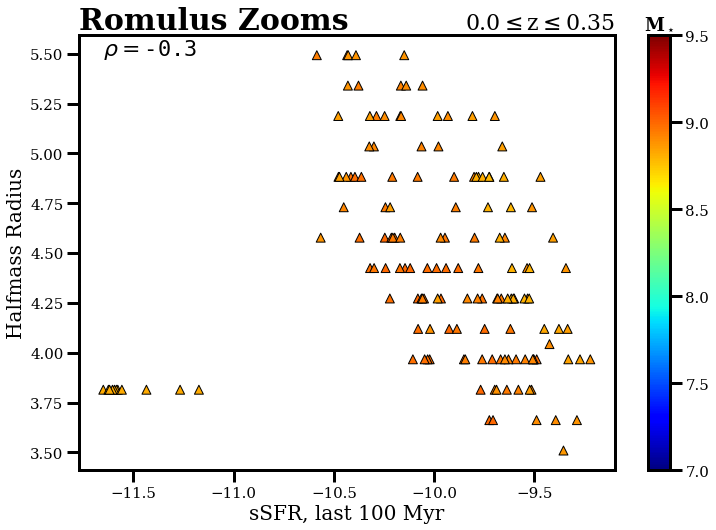

In [37]:
zmin = 0.0
zmax = 0.35

mmin = 8.5
mmax = 9.0
fig = plt.figure(facecolor='w', figsize=(12,8))

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=13)

# get data
ssfr = []
rhm = []
mall = []
for idx,gal in enumerate(currentGals[1:]):
    data = pd.read_csv(gal)

    x = data['sSFR_100'][data['z'] <= zmax].to_numpy()
    y = data['R_halfmass'][data['z'] <= zmax].to_numpy()
    c = np.log10(data['M_star'][data['z'] <= zmax].to_numpy())
    z = data['z'][data['z']<= zmax].to_numpy()
    
    x = x[z>=zmin]
    y = y[z>=zmin]
    c = c[z>=zmin]
    
    x = x[c>=mmin]
    y = y[c>=mmin]
    c = c[c>=mmin]
    
    x = x[c<=mmax]
    y = y[c<=mmax]
    c = c[c<=mmax]
    
    for i,_ in enumerate(x):
        ssfr.append(x[i])
        rhm.append(y[i])
        mall.append(c[i])
        
rs = ss.spearmanr(ssfr, rhm)[0]
        
# scatter 
plt.scatter(ssfr, rhm, c=mall, cmap='jet', s=80, ec='k', marker='^', vmin=7.0, vmax=9.5)

plt.xlabel('sSFR, last 100 Myr', fontsize=20)
plt.ylabel(r'Halfmass Radius', fontsize=20)

#plt.xscale('log')

clb = plt.colorbar()
clb.ax.set_title(r'M$_\star$', fontsize=18, weight='bold')
clb.ax.tick_params(labelsize=15)

plt.title('FIRE Zooms', fontsize=30, weight='bold', loc='left')
plt.title(str(zmin)+r'$\leq$z$\leq$'+str(zmax), fontsize=22, loc='right')

plt.text(x=min(ssfr), y=max(rhm), s=r'$\rho=$'+str(rs)[:4], fontsize=22, fontfamily='monospace')

ff = '../figures/breathingModes/ssfr100_SigYS_group/'+str(zmin)[:3]+'z'+str(zmax)[:3]+'.png'
#plt.savefig(ff)

# with Mass Binning

In [29]:
mm

array([], dtype=float64)

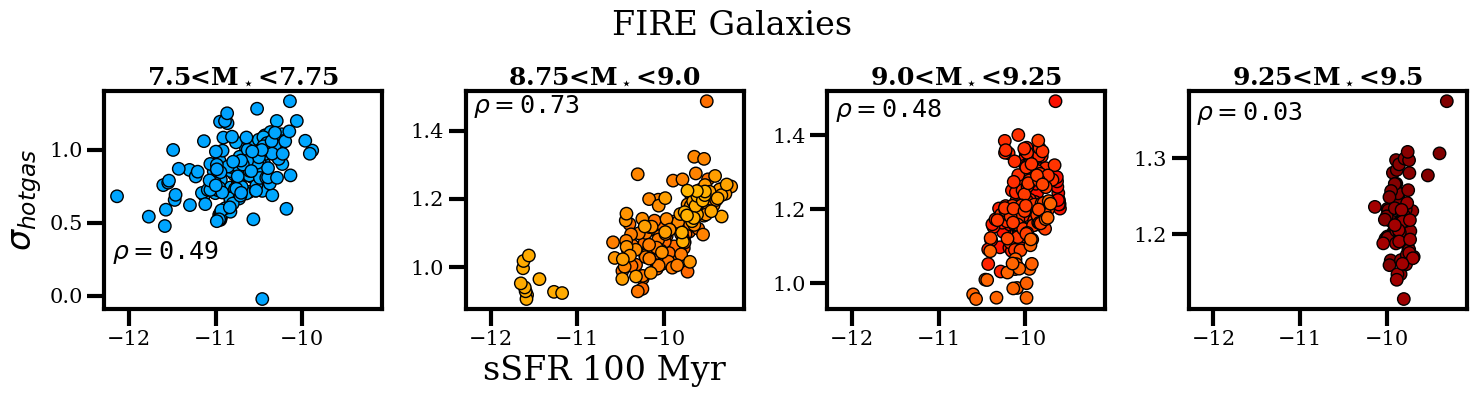

In [67]:
# SIG
fig, axs = plt.subplots(1,4, figsize=(15,4), facecolor='w', sharex=True, sharey=False)

zmin = 0.00
zmax = 0.35

#mbins = [7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
mbins_lower = [7.5, 8.75, 9.0, 9.25]
mbins_upper = [7.75, 9.0, 9.25, 9.5]

txty = [0.25, 1.45, 1.45, 1.35]
for i,ax in enumerate(axs):
    ssfr = []
    sigCG = []
    mall = []
    
    mstar_min = mbins_lower[i]
    mstar_max = mbins_upper[i]
    for idx,gal in enumerate(currentGals[:]):
        
        data = pd.read_csv(gal)
        
        massmask = np.log10(np.array(data['M_star']))>= mstar_min
        mm = np.log10(np.array(data['M_star']))[massmask]
        #print(gal)
        #print(mm)
        x = np.array(data['sSFR_100'])[massmask]
        y = np.array(data['sigma_coldgas_los'])[massmask]
        z = np.array(data['z'])[massmask]

        massmask = mm<=mstar_max
        mm = mm[massmask]
        x = x[massmask]
        y = y[massmask]
        z = z[massmask]

        zmask = z>=zmin
        mm = mm[zmask]
        x = x[zmask]
        y = y[zmask]
        z = z[zmask]
        
        zmask = z<=zmax
        mm = mm[zmask]
        x = x[zmask]
        y = y[zmask]
        z = z[zmask]
        
        for j,_ in enumerate(x):
            ssfr.append(x[j])
            sigCG.append(y[j])
            mall.append(mm[j])
        
    sigCG = np.log10(sigCG)
        
    ax.scatter(ssfr, sigCG, c=mall, cmap='jet', s=80, ec='k', vmin=7,vmax=9.5)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=13)

    sigCG = np.nan_to_num(sigCG, copy=True, nan=0.0)
    p = ss.spearmanr(ssfr, sigCG)[0]
    ax.text(s=r'$\rho = $'+str(p)[:4], x=-12.2, y=txty[i], fontsize=18, fontfamily='monospace')
    
    ax.set_title(str(mstar_min)+'<M$_\star$<'+str(mstar_max), fontsize=18, weight='bold')

# colorbar
#cax = make_axes_locatable(axs[-1]).append_axes('right', size='5%', pad=0.05)
#fig.colorbar(s, cax=cax, orientation='vertical')
#cax.set_title(r'M$_\star$', fontsize=12, weight='bold')
#cax.tick_params(axis='both', which='major', labelsize=12)
    
# prettify 
axs[1].set_xlabel('sSFR 100 Myr', fontsize=24)
axs[0].set_ylabel(r'$\sigma_{hot gas}$', fontsize=24)

plt.suptitle('FIRE Galaxies', fontsize=24)

plt.tight_layout()

pf = '../figures/breathingModes/fire/ssfr100_hmr_binned3.png'
plt.savefig(pf, dpi=600)

In [51]:
sigCG

array([ 0.55347007,  0.53961701,  0.54969867,  0.56521681,  0.53585993,
        0.51942354,  0.53506949,  0.53085151,  0.52687905,  0.53740289,
        0.54639216,  1.01119684,  0.94645228,  0.90255123,  1.10700459,
        0.95887806,  1.1981821 ,  0.97895275,  0.80781955,  0.73150872,
        0.57524868,  0.87001417,  1.02786798,  1.06943212,  0.81901532,
        1.00523449,  1.09922846,  0.95234772,  1.05124289,  0.71742791,
        0.86234048,  0.74170097,  0.73139679,  0.71127809,  0.75825791,
        0.81354963,  0.82056215,  0.71060158,  0.60014659,  0.70285046,
        0.65185573,  0.66648175,  0.72378034,  0.70095699,  0.83262561,
        1.01685497,  1.12218178,  1.00284646,  1.08687425,  0.82819772,
        0.80106859,  0.86284009,  0.83205694,  0.71936493,  0.90714583,
        0.89492054,  0.81374784,  0.91018165,  0.79416574,  0.85194301,
        0.77989533,  0.79465745,  0.6659717 ,  0.75752497,  0.69011545,
        0.77511883,  0.58490698,  0.52334278,  0.97070511,  1.04